In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('expresso_processed.csv')
data.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


In [3]:
data.CHURN.value_counts()

CHURN
0    35000
1    29376
Name: count, dtype: int64

In [25]:
data.columns

Index(['Unnamed: 0', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'MRG',
       'REGULARITY', 'CHURN'],
      dtype='object')

In [4]:
data.isnull().sum()

Unnamed: 0        0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
MRG               0
REGULARITY        0
CHURN             0
dtype: int64

In [26]:
dt.columns

Index(['Unnamed: 0', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'MRG',
       'REGULARITY', 'CHURN'],
      dtype='object')

In [6]:
num= dt.select_dtypes(include= 'number')
cat= dt.select_dtypes(exclude= 'number')

display(num.head())
display(cat.head())

,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,0,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,32,1
1,1,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,29,1
2,2,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,49,1
3,3,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,1,1
4,4,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,21,1


,TENURE,MRG
0,K > 24 month,NO
1,K > 24 month,NO
2,K > 24 month,NO
3,I 18-21 month,NO
4,K > 24 month,NO


<Axes: xlabel='CHURN', ylabel='count'>

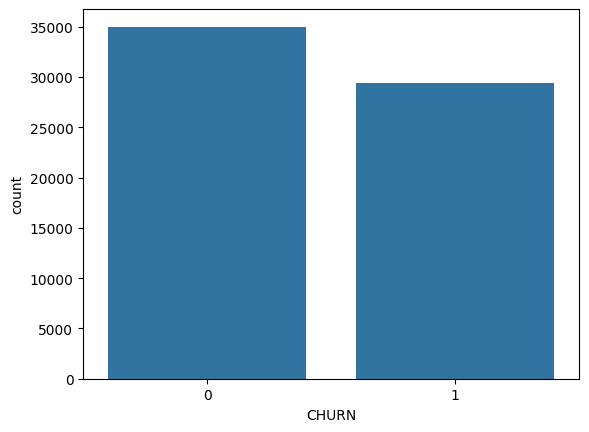

In [7]:
sns.countplot(x = dt['CHURN'])

In [8]:
# encoding of the categorical variable
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
for i in cat:
    if i in dt.columns:
        dt[i]= encoder.fit_transform(dt[i])
dt.head()


,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,7,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,0,32,1
1,1,7,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,0,29,1
2,2,7,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,0,49,1
3,3,5,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,0,1,1
4,4,7,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,0,21,1


In [10]:
dt.describe()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
count,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.00000,64376.0,64376.000000,64376.000000
mean,16216.330620,6.855459,5061.212812,10.630126,5173.670560,1724.561591,13.252718,3252.074189,218.65919,0.0,33.197496,0.456319
std,9501.522628,0.694836,6777.622016,12.490926,6913.023944,2304.338459,13.988994,7841.567790,754.75000,0.0,20.432429,0.498092
min,0.000000,0.000000,50.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.0,1.000000,0.000000
25%,8046.750000,7.000000,1000.000000,2.000000,1001.000000,334.000000,3.000000,1.000000,3.00000,0.0,14.000000,0.000000
50%,16093.500000,7.000000,2900.000000,6.000000,2951.000000,984.000000,8.000000,507.000000,15.00000,0.0,32.000000,0.000000
75%,24140.250000,7.000000,6500.000000,14.000000,6699.000000,2233.000000,18.000000,3156.000000,97.00000,0.0,54.000000,1.000000
max,34999.000000,7.000000,286500.000000,133.000000,323541.000000,107847.000000,91.000000,283493.000000,25263.00000,0.0,62.000000,1.000000


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x= dt.drop('CHURN', axis=1)
y= dt.CHURN

xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size= 0.2, random_state=42, stratify=y)

In [12]:
logreg= LogisticRegression()
logreg.fit(xtrain, ytrain)

cross_val= logreg.predict(xtrain)
print(classification_report(cross_val, ytrain))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78     30161
           1       0.68      0.75      0.71     21339

    accuracy                           0.75     51500
   macro avg       0.74      0.75      0.74     51500
weighted avg       0.75      0.75      0.75     51500



<Axes: >

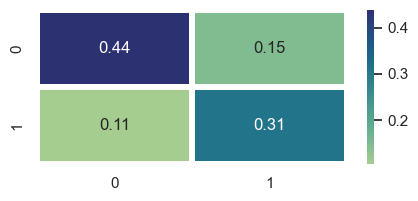

In [13]:
matrix= confusion_matrix(cross_val, ytrain)
plt.figure(figsize=(5,2))
sns.set(style= 'darkgrid')
sns.heatmap(matrix/np.sum(matrix), annot= True, cmap= 'crest', linewidths=3)

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      7602
           1       0.68      0.76      0.72      5274

    accuracy                           0.75     12876
   macro avg       0.75      0.75      0.75     12876
weighted avg       0.76      0.75      0.75     12876



<Axes: >

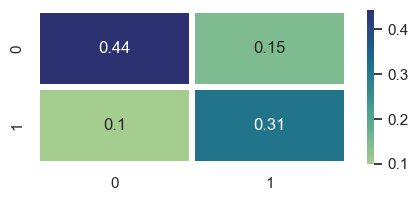

In [14]:
# -evaluating the test set
test_pred= logreg.predict(xtest)
print(classification_report(test_pred, ytest))

revealer= confusion_matrix(test_pred, ytest)
plt.figure(figsize=(5,2))
sns.set(style= 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap= 'crest', linewidths=4)

In [15]:
output= pd.concat([xtest.reset_index(drop= True),ytest.reset_index(drop = True)], axis=1)
output['Predicted'] = pd.Series(test_pred)

output

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN,Predicted
0,14331,5,6500.0,16.0,6510.0,2170.0,19.0,9222.0,2.0,0,49,1,0
1,11826,7,4900.0,7.0,4901.0,1634.0,12.0,9164.0,0.0,0,17,0,1
2,9688,7,3300.0,10.0,3147.0,1049.0,15.0,0.0,22.0,0,40,1,0
3,21372,7,6000.0,12.0,6000.0,2000.0,12.0,0.0,333.0,0,57,0,0
4,4523,7,6550.0,17.0,6547.0,2182.0,19.0,0.0,16.0,0,54,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12871,9737,7,250.0,1.0,250.0,83.0,1.0,755.0,36.0,0,2,1,1
12872,2745,7,13700.0,36.0,14246.0,4749.0,53.0,23966.0,2.0,0,58,0,1
12873,21368,7,250.0,2.0,246.0,82.0,2.0,2183.0,47.0,0,9,1,1
12874,8923,7,2900.0,6.0,2897.0,966.0,8.0,6245.0,0.0,0,15,1,1


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decisions= DecisionTreeClassifier(random_state=42)
decisions.fit(xtrain, ytrain)

ypred= decisions.predict(xtest)
print("Accuracy score: {}".format(accuracy_score(ytest, ypred)))


Accuracy score: 0.7056539297918608


In [23]:
import pickle
pickle.dump(decisions, open('expressochurn.pkl', "wb"))

In [24]:
import pickle 
pickle.dump(encoder,open('encoder.pkl', "wb"))

In [20]:
import tensorflow as tf

In [22]:
deepModel = tf.keras.Sequential([
                    tf.keras.layers.Dense(units=10, activation='relu'), #... Input layer of 12 features
                    tf.keras.layers.Dense(10, activation='relu'), #.... Add the second 20 layer, and instantiate the activation to be used.
                    tf.keras.layers.Dense(12, activation='relu'), #..... Add the third layer.
                    tf.keras.layers.Dense(1, activation='sigmoid') #... Add the last output layer
])

deepModel.compile(optimizer='adam', # ..................... The optimizer that adjusts weight and bias for a given neuron
              loss = 'binary_crossentropy', #...... Loss calculates the error of the prediction
              metrics=['accuracy']) #.................. Accuracy calculates the precision of the prediction.

deepModel.fit(xtrain, ytrain, epochs = 10)

Epoch 1/10


30100/30100 [==============================] - 100s 3ms/step - loss: 0.3915 - accuracy: 0.8208
Epoch 2/10
30100/30100 [==============================] - 81s 3ms/step - loss: 0.3900 - accuracy: 0.8219
Epoch 3/10
30100/30100 [==============================] - 91s 3ms/step - loss: 0.3898 - accuracy: 0.8219
Epoch 4/10
30100/30100 [==============================] - 108s 4ms/step - loss: 0.3897 - accuracy: 0.8221
Epoch 5/10
30100/30100 [==============================] - 138s 5ms/step - loss: 0.3896 - accuracy: 0.8221
Epoch 6/10
30100/30100 [==============================] - 92s 3ms/step - loss: 0.3896 - accuracy: 0.8221
Epoch 7/10
30100/30100 [==============================] - 82s 3ms/step - loss: 0.3896 - accuracy: 0.8221
Epoch 8/10
30100/30100 [==============================] - 80s 3ms/step - loss: 0.3896 - accuracy: 0.8221
Epoch 9/10
30100/30100 [==============================] - 72s 2ms/step - loss: 0.3895 - accuracy: 0.8222
Epoch 10/10
30100/30100 [=========================

In [25]:
# evaluate the model performance

y_pred = deepModel.predict(xtest)
y_pred = (y_pred > 0.5).astype(int)  #......................... set a 50% confidence level that the customer churns
outcome = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred.flatten()})
outcome

7525/7525 [==============================] - 18s 2ms/step


,Actual,Predicted
1536845,1,1
1131680,0,0
1560491,0,0
1364132,1,1
1196428,0,0
...,...,...
1641282,0,1
907131,0,1
324016,0,0
1336037,0,0


In [26]:
# Classification Report
print(classification_report(outcome.Actual, outcome.Predicted))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87    160001
           1       0.74      0.73      0.73     80797

    accuracy                           0.82    240798
   macro avg       0.80      0.80      0.80    240798
weighted avg       0.82      0.82      0.82    240798



In [28]:
pickle.dump(deepModel,open('DeepLearning Model.pkl', "wb"))